# Factors affecting the Borrower APR and MonthlyLoanPayment

Here, I try to investigate How some factors contribute to Borrower APR and Monthly Loan Payment. I will focus on only 9 variables from the dataset.
['BorrowerAPR','Borrower Rate','Investors','Recommendations','DebtToIncomeRatio','StatedMonthlyIncome','EmploymentStatus','Term','LoanOriginalAmount,'IsBorrowerHomeowner]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
data=pd.read_csv('prosperLoanData.csv')

In [3]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
n_rows,n_cols=data.shape

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
interest_cols=['BorrowerAPR','BorrowerRate','Investors','Recommendations','DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','EmploymentStatus','Term','MonthlyLoanPayment','IsBorrowerHomeowner']

In [7]:
df=data.loc[:,interest_cols]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BorrowerAPR          113912 non-null  float64
 1   BorrowerRate         113937 non-null  float64
 2   Investors            113937 non-null  int64  
 3   Recommendations      113937 non-null  int64  
 4   DebtToIncomeRatio    105383 non-null  float64
 5   StatedMonthlyIncome  113937 non-null  float64
 6   LoanOriginalAmount   113937 non-null  int64  
 7   EmploymentStatus     111682 non-null  object 
 8   Term                 113937 non-null  int64  
 9   MonthlyLoanPayment   113937 non-null  float64
 10  IsBorrowerHomeowner  113937 non-null  bool   
dtypes: bool(1), float64(5), int64(4), object(1)
memory usage: 8.8+ MB


#### Distribution of BorrowerAPR and BorrowerRate

In [9]:
df[['BorrowerRate','BorrowerAPR']].describe()

,BorrowerRate,BorrowerAPR
count,113937.000000,113912.000000
mean,0.192764,0.218828
std,0.074818,0.080364
min,0.000000,0.006530
25%,0.134000,0.156290
50%,0.184000,0.209760
75%,0.250000,0.283810
max,0.497500,0.512290


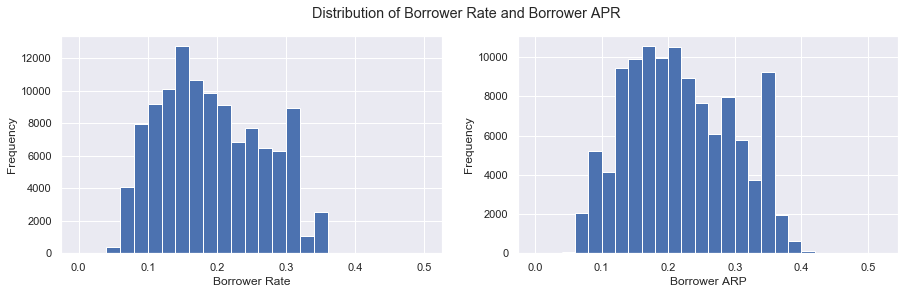

In [10]:
plt.figure(figsize=(15,4));
plt.subplot(1,2,1)
bins=np.arange(0,0.5+0.02,0.02);
plt.hist(data=df,x='BorrowerRate',bins=bins);
plt.xlabel('Borrower Rate');
plt.ylabel('Frequency');

plt.subplot(1,2,2)
bins=np.arange(0,0.52+0.02,0.02);
plt.hist(data=df,x='BorrowerAPR',bins=bins);
plt.xlabel('Borrower ARP');
plt.ylabel('Frequency');
plt.suptitle('Distribution of Borrower Rate and Borrower APR');

Looking at both histograms, they have very similar distributions which may indicate high correlation between them. Bimodal distribution shows a common Peak exists in both histograms at between 0.1 to 0.2 and a second peak just above 0.3 for Borrower Rate and about 0.35 for Borrower APR.

#### Borrower Rate Vs.Borrower APR 

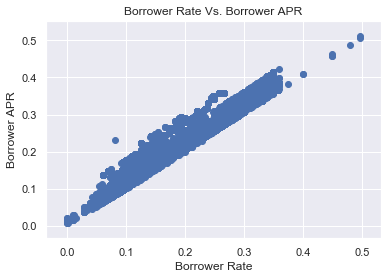

In [11]:
plt.scatter(data=df,y='BorrowerAPR',x='BorrowerRate');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR');
plt.title('Borrower Rate Vs. Borrower APR');

The scatter plot shows nearly perfect linear relationship between Borrower Rate and Borrower APR confirming high linear correlation between them.


#### Distribution of Debt to Income Ratio

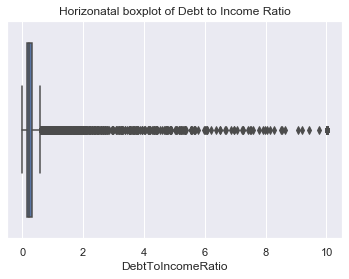

In [12]:
sb.boxplot(data=df,x='DebtToIncomeRatio');
plt.title('Horizonatal boxplot of Debt to Income Ratio');

From the boxplot, the range of values that debt to income ratio takes is very narrow compared to the range of values outliers take.

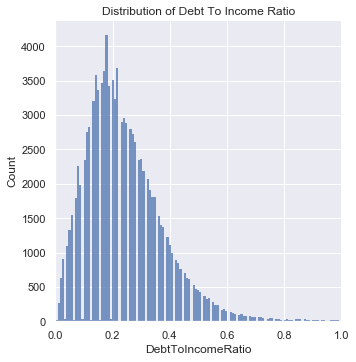

In [13]:
sb.displot(df['DebtToIncomeRatio'])
plt.xlim(0,1);
plt.title('Distribution of Debt To Income Ratio');

Limiting Debt to Income ratio to 1, a right skewed distribution is observed peaking at 0.2.

#### DebtToIncomeRatio Vs. BorrowerAPR

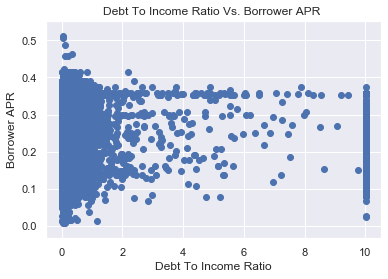

In [14]:
plt.scatter(data=df,x='DebtToIncomeRatio',y='BorrowerAPR');
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Borrower APR');
plt.title('Debt To Income Ratio Vs. Borrower APR ');

As the ratio ranges up to 1 , Borrower Rate is almost indifferently affected by it as it takes whole ranges of values - where most debt to income ratio data points lies-.A Ratio above 1 show slighlt increasing trend of Borrower APR, which can be reflected as increase of risk (Higher APR) as Debt to to income ratio increases.
An exception to that is the ratio of 10, where it means worst case of debt but still having wide range of BorrowerAPR.

#### Distribution Of Number of Investors

In [15]:
df['Investors'].describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

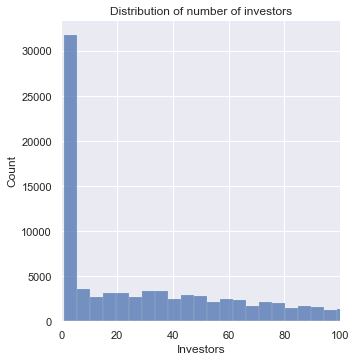

In [16]:
sb.displot(data=df,x='Investors')
plt.xlim(0,100);
plt.title('Distribution of number of investors');


Number of Investors take on values form 1 to 1189.Prevalent peak at five investors which pushes the mean towards a large number that is less frequent to occur. five investors contribute to largest potion of loans.

#### Investors Vs. Borrower APR

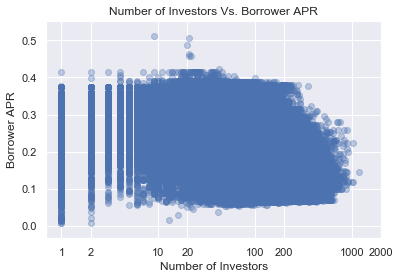

In [17]:

plt.scatter(data=df,x='Investors',y='BorrowerAPR',alpha=1/3);
plt.xlabel('Number of Investors');
plt.ylabel('Borrower APR');
plt.title('Number of Investors Vs. Borrower APR');
plt.xscale('log');
xticks=[1,2,10,20,100,200,1000,2000]
plt.xticks(xticks,xticks);

 A decreasing trend starting above 200 investors shows that as number of investors increase, borrower APR generally tend to decrease which could be interpreted as safer lower risk loan.

#### Recommendations Vs. Borrower APR

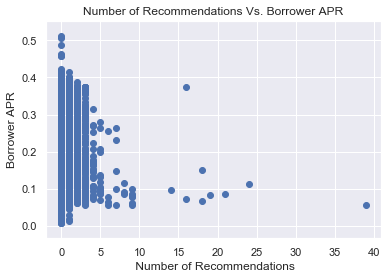

In [18]:

plt.scatter(data=df,x='Recommendations',y='BorrowerAPR');
plt.xlabel(' Number of Recommendations');
plt.ylabel('Borrower APR');
plt.title('Number of Recommendations Vs. Borrower APR');

Up to 4 recommendations, APR  seems to have wide range of values and for more than 4 recommendations, borrower APR decreases  gradually to less than 0.1 when exceeding 14 recommendations except for one observation.

#### Stated Monthly Income Vs. Borrower APR

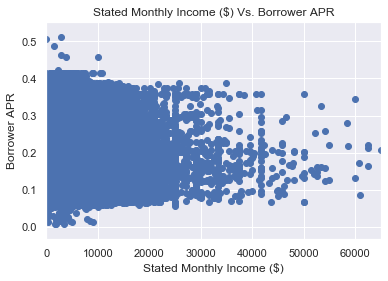

In [19]:
plt.scatter(data=df,x='StatedMonthlyIncome',y='BorrowerAPR');
plt.xlim(0,65000);
plt.title('Stated Monthly Income ($) Vs. Borrower APR');
plt.xlabel('Stated Monthly Income ($)');
plt.ylabel('Borrower APR');

The resulting chart is too crowded to notice any trend in the data, so I will create a rolling mean statistic to summarize a window of points of monthly income and plot it against Borrower APR instead of all blunt points.

In [20]:
df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

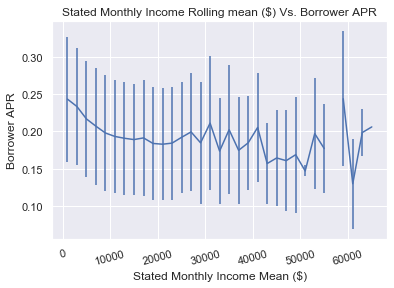

In [21]:
bin_edges=np.arange(0,65000+2000,2000)
bin_centers=bin_edges[:-1] + 1000
income_binned = pd.cut(df['StatedMonthlyIncome'], bin_edges, include_lowest = True)
mean=df['BorrowerAPR'].groupby(income_binned).mean()
std=df['BorrowerAPR'].groupby(income_binned).std()
plt.errorbar(x=bin_centers, y=mean,yerr=std)
plt.xticks(rotation=15);
plt.title('Stated Monthly Income Rolling mean ($) Vs. Borrower APR');
plt.xlabel('Stated Monthly Income Mean ($)');
plt.ylabel('Borrower APR');

A general decreasing trend is observed of Borrower APR as Monthly income increases. At around 30 K dollars incomes, the trend shows up and down peaks but that could be explained by fewer data points at these large values dividing by smaller number. Concluding that as monthly incomes increase , decreasing Borrower APR.

#### Borrower APR by Employment Status

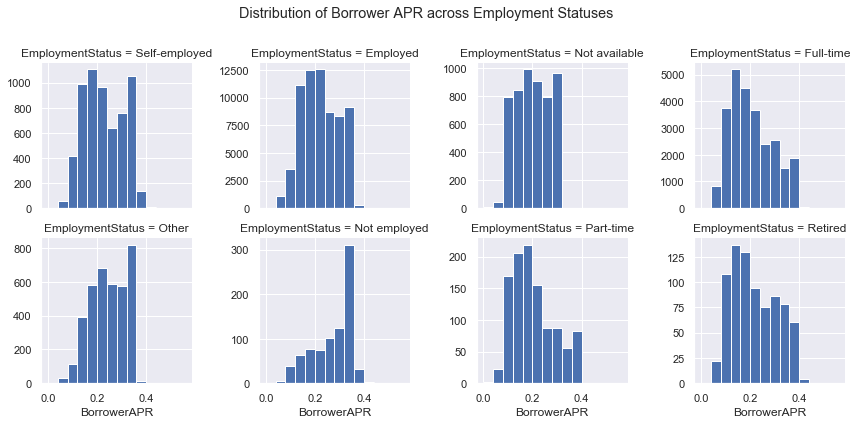

In [22]:
gr=sb.FacetGrid(data=df,col='EmploymentStatus',col_wrap=4,sharey=False);
bin_edges = np.arange(0, 0.52+0.04, 0.04);
gr.map(plt.hist,'BorrowerAPR',bins=bin_edges);
gr.fig.subplots_adjust(top=0.85)
gr.fig.suptitle('Distribution of Borrower APR across Employment Statuses');

Employed, full-time, retired distributions, part-time are right skewed where BorrowerAPR tends to be of a lower value.
Not employed shows clear left skew and APR tends to be higher, other and self-employed are less ditinguishable as they contain bimodal.

# Investigating Loan Monthly Payment


#### Loan Original Amount Vs. Monthly Loan Payment

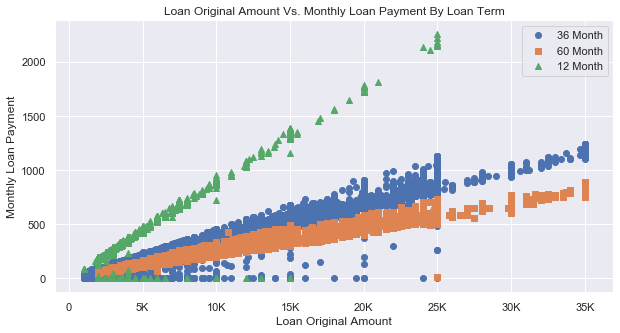

In [23]:
plt.figure(figsize=(10,5))
term_markers = [[36, 'o'],
               [60, 's'],
               [12,'^']]

for term, marker in term_markers:
    df_term = df[df['Term'] == term]
    plt.scatter(data = df_term, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', marker = marker)
plt.legend(['36 Month','60 Month','12 Month']);
plt.xlabel('Loan Original Amount');
plt.ylabel('Monthly Loan Payment');
plt.title('Loan Original Amount Vs. Monthly Loan Payment By Loan Term');
xticks=np.arange(0,35000+5000,5000)
xlabels=['0','5K','10K','15K','20K','25K','30K','35K']
plt.xticks(xticks,xlabels);

Looking at the relation between loan amount and monthly loan payment , we find three lines indicating Linear relationship that can be further defined by Term or loan duration.Loans with longest duration (60 month) have lowest monthly payments (smallest slope), whereas shortest duration loans have highest monthly payments (largest slope), and payments in between those values tend to be for moderate loan durations.

#### Monthly Loan Payments by Ownership of a home

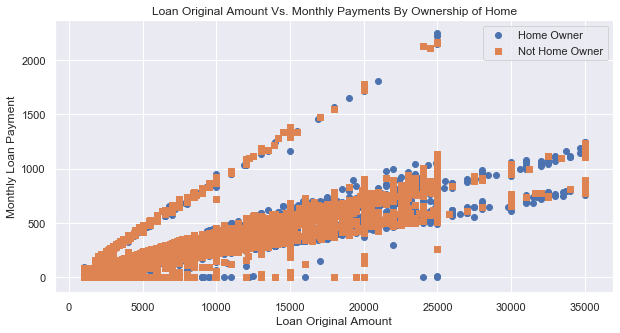

In [24]:
plt.figure(figsize=(10,5))
home_markers = [[True, 'o'],
               [False, 's']]
               

for home, marker in home_markers:
    df_term = df[df['IsBorrowerHomeowner'] == home]
    plt.scatter(data = df_term, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', marker = marker)
plt.legend(['Home Owner','Not Home Owner']);
plt.xlabel('Loan Original Amount');
plt.ylabel('Monthly Loan Payment');
plt.title('Loan Original Amount Vs. Monthly Payments By Ownership of Home');

It is observed that home owners as well as non home owners are distributed consistently across different loan amounts and loan payments amounts so it does not affect how much a loan payment is made.

#### Monthly Loan Payment By Employment Status

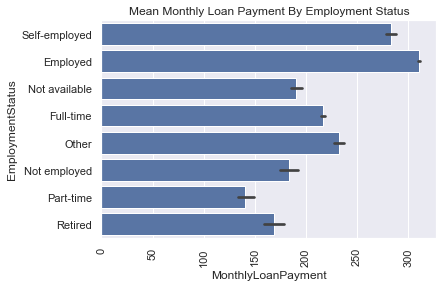

In [25]:
base_color=sb.color_palette()[0]
sb.barplot(data=df,y='EmploymentStatus',x='MonthlyLoanPayment',color=base_color);
plt.xticks(rotation=90);
plt.title('Mean Monthly Loan Payment By Employment Status');

Monthly Loan payment is found to be affected by employment status where employment tends to associate higher monthly payment and bing part-time or retired or not employed tends to associated less monthly payment.